___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Diagnose of Diseases Prediction Using K Nearest Neighbors

Hello! In this project I would like to predict certain type of diagnosed disease using K Nearest Neighbors.

## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


## Get the Data

In [45]:
df = pd.read_csv('wisc_bc_data.csv')

The data provide us with 31 attributes, strecth from the radius mean until the symmetry worst.

In [46]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

**As KNN can only be used with integers, we need to convert the target variable data type:**

In [48]:
df.diagnosis.nunique()

2

In [49]:
df['diagnosis'] =  df['diagnosis'].astype('category').cat.codes

In [50]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


# EDA

In [10]:
import seaborn as sns

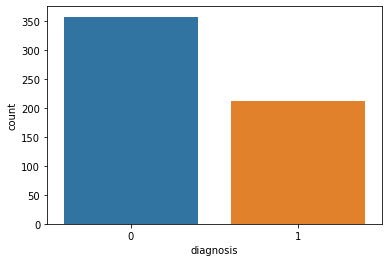

In [52]:
sns.countplot(df['diagnosis'])

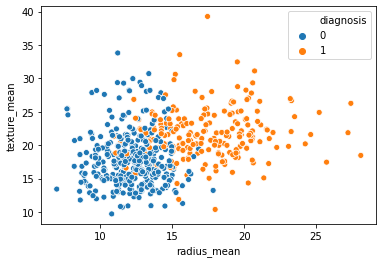

In [84]:
sns.scatterplot(x = 'radius_mean', y = 'texture_mean', hue='diagnosis', data = df)

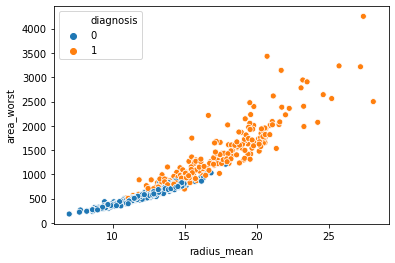

In [83]:
sns.scatterplot(x = 'radius_mean', y = 'area_worst', hue='diagnosis', data = df)

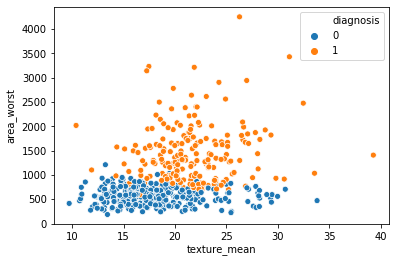

In [85]:
sns.scatterplot(x = 'texture_mean', y = 'area_worst', hue='diagnosis', data = df)

# Standardize the Variables

Time to standardize the variables.

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

In [61]:
scaler.fit(df.drop('diagnosis', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [62]:
scaled_features = scaler.transform(df.drop('diagnosis', axis=1))

In [65]:
df_trans = pd.DataFrame(scaled_features)

In [66]:
df_trans.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.454465,-0.513297,-1.605595,-0.540376,-0.542624,0.458285,-0.654413,-0.614306,-0.307442,0.538081,...,-0.573451,-1.634499,-0.604391,-0.582718,0.268776,-0.812128,-0.709978,-0.315133,-0.119321,-0.899721
1,-0.171815,-1.001801,-0.079038,-0.934566,-0.877375,0.036986,0.196319,-0.312987,-0.580343,0.402996,...,-0.908925,-0.445740,-0.863230,-0.801227,-0.485202,-0.017590,-0.386625,-0.538203,0.063489,-0.447528
2,-0.235899,-0.876835,-0.572377,-0.867014,-0.801153,0.806996,-0.498443,-0.732448,-0.622129,-0.356400,...,-0.799171,0.124213,-0.814083,-0.719308,0.198638,-0.674722,-0.793935,-0.613574,0.157320,-0.284606
3,-0.236192,-0.808671,-1.372888,-0.781338,-0.768161,1.426135,0.175472,-0.532950,-0.024740,-0.148296,...,-0.900641,-1.613330,-0.915355,-0.785054,0.189871,-0.458434,-0.889933,-0.433901,-1.292212,-0.892517
4,-0.170996,0.301824,-1.414775,0.234000,0.161860,-1.190618,-0.663320,-0.688883,-0.576473,-0.330843,...,-0.014328,-1.619844,-0.082245,-0.108082,-0.866574,-0.512506,-0.652408,-0.499832,-0.669366,-0.902492


# Train Test Split

**Use train_test_split to split the data into a training set and a testing set.**

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['diagnosis'], test_size = 0.3)

# Using KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

For beginning, let's try using K value of 1

In [71]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [72]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

In [73]:
pred = knn.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
print(confusion_matrix(y_test, pred))

[[97  4]
 [ 4 66]]


In [75]:
print(classification_report(y_test, pred))

precision    recall  f1-score   support

           0       0.96      0.96      0.96       101
           1       0.94      0.94      0.94        70

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



It generates pretty high accuracy! However is it the best use of K value?

# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!


In [76]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

Text(0, 0.5, 'Error Rate')

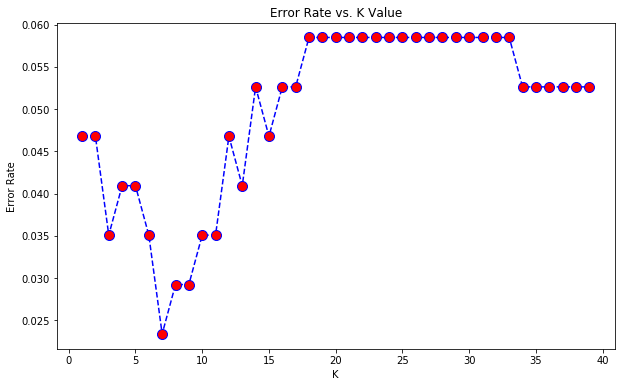

In [77]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

From the graph above, it looks like that K value of 6 generates the lowest error.

## Retrain with new K Value

In [78]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


[[100   1]
 [  5  65]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       101
           1       0.98      0.93      0.96        70

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



As expected, K value of 6 gives us better result!